In [1]:
import gensim
import os
from distutils.version import LooseVersion, StrictVersion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import re

In [2]:
dir_path=os.path.dirname('D:/Ki7/PBL6/')
print(dir_path)
model = dir_path + '/wiki.vi.model.bin'

D:/Ki7/PBL6


In [3]:
if os.path.isfile(model):
    word2vec_model  = gensim.models.KeyedVectors.load_word2vec_format(model, binary=True)
else: print("No")

In [4]:
word2vec_model.key_to_index

{'và': 0,
 'của': 1,
 'là': 2,
 'được': 3,
 'một': 4,
 'thể': 5,
 'các': 6,
 'năm': 7,
 'trong': 8,
 'có': 9,
 'loại': 10,
 'người': 11,
 'với': 12,
 'đã': 13,
 'tháng': 14,
 'cho': 15,
 'thành': 16,
 'này': 17,
 'không': 18,
 'vào': 19,
 'từ': 20,
 'số': 21,
 'những': 22,
 'quân': 23,
 'công': 24,
 'tại': 25,
 'nam': 26,
 'quốc': 27,
 'ngày': 28,
 'khi': 29,
 'chính': 30,
 'đến': 31,
 'đầu': 32,
 'học': 33,
 'ông': 34,
 'dân': 35,
 'sau': 36,
 'về': 37,
 'trung': 38,
 'nhà': 39,
 'sự': 40,
 'liên': 41,
 'bị': 42,
 'trên': 43,
 'ra': 44,
 'vật': 45,
 'động': 46,
 'đó': 47,
 'để': 48,
 'tham': 49,
 'như': 50,
 'gia': 51,
 'kết': 52,
 'bộ': 53,
 'loài': 54,
 'bar': 55,
 'họ': 56,
 'đại': 57,
 'theo': 58,
 'hiện': 59,
 'chiến': 60,
 'nhất': 61,
 'làm': 62,
 'hành': 63,
 'nước': 64,
 'tập': 65,
 'lại': 66,
 'the': 67,
 'phát': 68,
 'thực': 69,
 'nhân': 70,
 'bản': 71,
 'anh': 72,
 'thế': 73,
 'cũng': 74,
 'thời': 75,
 'khảo': 76,
 'ngoài': 77,
 'xã': 78,
 'việt': 79,
 'hình': 80,
 'nhiều':

In [5]:
word2vec_model.most_similar('cha')

[('mẹ', 0.6442643404006958),
 ('vợ', 0.6007395386695862),
 ('trai', 0.5517430305480957),
 ('cháu', 0.5253162980079651),
 ('dì', 0.512165367603302),
 ('bà', 0.5023377537727356),
 ('rể', 0.46636664867401123),
 ('gái', 0.4502718150615692),
 ('ông', 0.4228934049606323),
 ('út', 0.4095265865325928)]

In [23]:
word2vec_model['mèo']

array([ 8.2150549e-01, -1.4640735e+00,  5.8060539e-01,  1.4577582e-01,
        1.9431654e+00, -5.8665305e-01, -1.1374174e+00,  2.5186102e+00,
       -6.9771266e-01,  3.5877725e-01,  2.2131333e+00,  6.5586513e-01,
       -2.3808639e-01, -1.6514527e-02,  4.4168821e-01,  6.3552558e-01,
        8.4222436e-01,  9.1235292e-01,  3.8136568e+00,  3.5464230e-01,
        5.0006604e-01,  1.0428933e+00,  6.4519078e-02,  2.9116473e-01,
        1.1942883e+00, -8.2139778e-01,  2.0872703e+00,  5.7897443e-01,
       -1.2796425e+00, -7.0577598e-01,  4.4612540e-03, -2.0080493e-01,
        1.1614679e+00, -1.4429610e+00, -1.6894561e+00,  1.4977919e+00,
        1.3828582e+00, -6.7326362e-04,  7.4131089e-01, -2.4167787e-01,
       -1.5302329e+00,  1.0135194e+00,  1.9178418e+00, -5.4863250e-01,
       -1.6301611e-01,  5.6529534e-01,  1.9485714e+00, -3.1812745e-01,
        1.5681082e+00, -1.3137645e+00, -8.2176006e-01, -1.5080081e+00,
        5.2466089e-01, -1.4159520e+00, -1.8571965e-02, -7.1992025e-02,
      

In [24]:
word2vec_model['chó']

array([-0.93986666, -0.8445314 , -0.07553717,  2.6274645 ,  1.5112232 ,
       -0.03801244, -1.6806756 ,  2.0295475 ,  1.2158235 ,  1.1129524 ,
        1.2539294 , -1.0965266 ,  0.20590614, -1.9497775 , -0.48182935,
       -0.02299997, -0.3209266 ,  0.751449  ,  3.506041  , -0.8462148 ,
        0.54032314,  1.4764256 , -0.43032557,  0.69997305,  0.23937425,
       -0.50605947,  0.6775785 ,  1.3159684 , -0.9564985 , -0.76739043,
        0.6037712 ,  0.02992206,  0.3389948 , -0.9268986 , -1.6613503 ,
        2.940676  ,  1.3176426 ,  0.5213776 ,  0.93691593,  0.5063709 ,
       -0.08835533, -0.6476535 , -0.4228612 , -0.81168586, -0.19050251,
        2.2065842 ,  0.7268164 , -1.6381396 ,  0.5750076 ,  0.34613198,
       -0.22988819, -0.70728856,  1.7878699 , -0.5966465 , -0.7655873 ,
        0.28784525,  1.0688664 ,  1.2934675 , -3.2023416 ,  0.21771297,
       -0.91796744,  0.8599861 ,  0.20995411,  0.9521073 ,  0.1412145 ,
        0.61006904, -0.13724191, -0.03701299,  1.6994069 , -0.34

In [8]:
word2vec_model.evaluate_word_analogies


<bound method KeyedVectors.evaluate_word_analogies of <gensim.models.keyedvectors.KeyedVectors object at 0x0000025D78CE1840>>

In [25]:
word2vec_model.get_index('mèo')

1660

In [10]:
vector = word2vec_model.get_vector('office', norm=True)
vector.shape

(400,)

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [12]:
keys=word2vec_model.key_to_index.keys

In [13]:
print(keys)

<built-in method keys of dict object at 0x0000025D57906880>


In [14]:
X = word2vec_model[word2vec_model.key_to_index]

In [15]:
X

array([[ 1.51843655e+00,  7.02828884e-01, -1.45200372e+00, ...,
        -7.59526908e-01,  7.34070361e-01,  2.19975933e-01],
       [ 9.30967510e-01,  4.68705982e-01, -1.82646453e+00, ...,
        -2.17166424e+00,  9.22626138e-01,  3.71891353e-03],
       [ 4.93049711e-01,  1.32833207e+00, -8.95295620e-01, ...,
         5.39868847e-02, -2.08080363e+00, -6.39965057e-01],
       ...,
       [ 1.23516433e-02,  4.03962936e-03,  5.13350330e-02, ...,
         2.67250519e-02, -3.36705893e-02,  4.56015626e-03],
       [ 5.51319402e-03,  9.24775526e-02,  1.16726905e-01, ...,
        -5.20768343e-03,  2.88103037e-02, -1.90817527e-02],
       [-1.20525099e-02, -2.76813414e-02,  5.15360124e-02, ...,
         3.91402803e-02,  1.50637701e-03, -4.41907672e-03]], dtype=float32)

In [16]:
X[1:100]

array([[ 0.9309675 ,  0.46870598, -1.8264645 , ..., -2.1716642 ,
         0.92262614,  0.00371891],
       [ 0.4930497 ,  1.3283321 , -0.8952956 , ...,  0.05398688,
        -2.0808036 , -0.63996506],
       [ 1.1795701 ,  0.12519002, -1.2484643 , ..., -0.5440823 ,
         0.03132815, -1.3108251 ],
       ...,
       [ 0.5770151 ,  1.9977453 ,  1.6681881 , ..., -1.768968  ,
        -0.13523705, -1.8170394 ],
       [ 1.6018219 ,  2.016102  ,  0.45611873, ...,  2.097785  ,
         2.7369459 ,  0.43663397],
       [ 0.01495696,  0.31636703,  0.73303246, ..., -0.6622061 ,
         1.1167692 , -2.7849953 ]], dtype=float32)

In [17]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [18]:
di={'và': 0,
 'của': 1,
 'là': 2,
 'được': 3,
 'một': 4,
 'thể': 5,
 'các': 6,
 'năm': 7,
 'trong': 8,
 'có': 9,
 'loại': 10,
 'người': 11,
 'với': 12,
 'đã': 13,
 'tháng': 14,
 'cho': 15,
 'thành': 16,
 'này': 17,
 'không': 18,
 'vào': 19,
 'từ': 20,
 'số': 21,
 'những': 22,
 'quân': 23,
 'công': 24,
 'tại': 25,
 'nam': 26,
 'quốc': 27,
 'ngày': 28,
 'khi': 29,
 'chính': 30,
 'đến': 31,
 'đầu': 32,
 'học': 33,
 'ông': 34,
 'dân': 35,
 'sau': 36,
 'về': 37,
 'trung': 38,
 'nhà': 39,
 'sự': 40,
 'liên': 41,
 'bị': 42,
 'trên': 43,
 'ra': 44,
 'vật': 45,
 'động': 46,
 'đó': 47,
 'để': 48,
 'tham': 49,
 'như': 50,
 'gia': 51,
 'kết': 52,
 'bộ': 53,
 'loài': 54,
 'bar': 55,
 'họ': 56,
 'đại': 57,
 'theo': 58,
 'hiện': 59,
 'chiến': 60,
 'nhất': 61,
 'làm': 62,
 'hành': 63,
 'nước': 64,
 'tập': 65,
 'lại': 66,
 'the': 67,
 'phát': 68,
 'thực': 69,
 'nhân': 70,
 'bản': 71,
 'anh': 72,
 'thế': 73,
 'cũng': 74,
 'thời': 75,
 'khảo': 76,
 'ngoài': 77,
 'xã': 78,
 'việt': 79,
 'hình': 80,
 'nhiều': 81,
 'sử': 82,
 'thị': 83,
 'pháp': 84,
 'con': 85,
 'sinh': 86,
 'hai': 87,
 'chỉ': 88,
 'tin': 89,
 'do': 90,
 'thuộc': 91,
 'đồng': 92,
 'quan': 93,
 'tên': 94,
 'độ': 95,
 'nó': 96,
 'viên': 97,
 'of': 98,
 'hoa': 99,
  'text': 100}

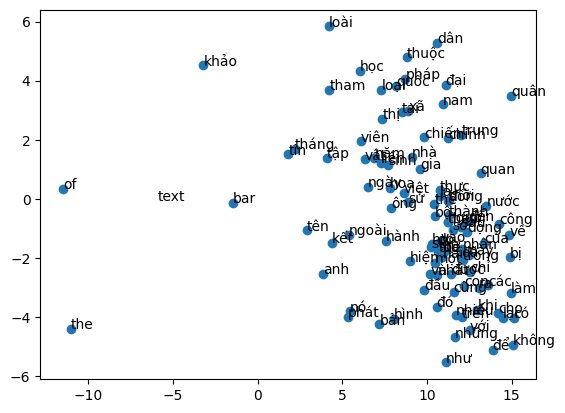

In [19]:
pyplot.scatter(result[0:100,0], result[0:100,1])
# words = list(word2vec_model.key_to_index)
for i, word in enumerate(di):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()